<a href="https://colab.research.google.com/github/yeahjinjeong/ITmining2022/blob/main/%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 스토어 랭킹에 영향을 미치는 요소

## 8조

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
google = pd.read_csv("/content/drive/My Drive/Colab Notebooks/team_project/Google-Playstore.csv")
display(google.head())

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
pd.set_option('display.max_columns', None)

In [53]:
gps = google
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


1. 앱의 국적, 개발국가를 알기 위해 App Name을 한국어, 영어, 중국어, 일본어 등으로 분류
2. Currency 로 분류
3. 카테고리 별 분석
4. Content Rating 별 분석

In [ ]:
gps.shape

(2312944, 24)

In [5]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [ ]:
gps.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,2312942,2312944,2312944,2.290061e+06,2.290061e+06,2312837,2.312837e+06,2.312944e+06,2312944,2.312944e+06,2312809,2312748,2306414,2312911,1552109,2312913,2241891,2312944,2312944,1891991,2312944,2312944,2312944,2312944
unique,2177944,2312944,48,NaN,NaN,22,NaN,NaN,2,NaN,15,1657,154,758371,810440,950456,4158,3918,6,977743,2,2,2,67374
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,100+,NaN,NaN,True,NaN,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Jun 16, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,False,False,False,2021-06-16 07:35:57
freq,382,1,241090,NaN,NaN,443368,NaN,NaN,2267876,NaN,2311548,74777,604465,5422,7519,10345,2051,11186,2022089,7481,1162170,2117635,2312091,56
mean,NaN,NaN,NaN,2.203152e+00,2.864839e+03,NaN,1.834452e+05,3.202017e+05,NaN,1.034992e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.106223e+00,2.121626e+05,NaN,1.513144e+07,2.355495e+07,NaN,2.633127e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,5.000000e+01,8.400000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.900000e+00,6.000000e+00,NaN,5.000000e+02,6.950000e+02,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.300000e+00,4.200000e+01,NaN,5.000000e+03,7.354000e+03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
display(gps.isna().sum())

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [ ]:
cate_count = gps['Category'].value_counts()
print(cate_count) 

Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto & Vehicle

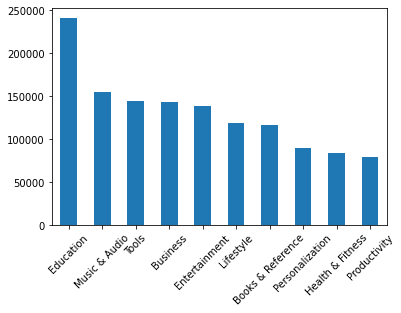

In [ ]:
cate_count[:10].plot.bar(rot=45)

In [ ]:
curr_count = gps['Currency'].value_counts()
print(curr_count) 

USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64


In [ ]:
andver_count = gps['Minimum Android'].value_counts()
print(andver_count) 

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64


In [ ]:
installs_count = gps['Installs'].value_counts()
print(installs_count) 

100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64


https://zephyrus1111.tistory.com/44

In [55]:
#gps.drop(columns='Scraped Time', inplace=True)
gps = gps.drop('Scraped Time', axis=1)
gps = gps.drop('Developer Id', axis=1)
gps = gps.drop('Developer Website', axis=1)
gps = gps.drop('Developer Email', axis=1)
gps = gps.drop('Privacy Policy', axis=1)
gps = gps.dropna(subset=['App Name'],axis=0)
gps = gps.dropna(subset=['Currency'],axis=0)
gps = gps.dropna(subset=['Size'],axis=0)
gps = gps.dropna(subset=['Installs'],axis=0)
gps = gps.dropna(subset=['Released'],axis=0)

In [56]:
gps.loc[gps['Rating'] != gps['Rating'], 'Rating'] = 0
gps.loc[gps['Rating Count'] != gps['Rating Count'], 'Rating Count'] = 0

In [9]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10M,4.1 and up,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False


In [57]:
gps.loc[gps['Minimum Android'] != gps['Minimum Android'], 'Minimum Android'] = "4.1 and up"

In [58]:
display(gps.isna().sum())

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [59]:
gps["Released"]=gps["Released"].apply(str)
gps["Last Updated"]=gps["Last Updated"].apply(str)

In [60]:
#gps['Size'] = gps['Size'].map(lambda x:x[:-1])

gps['Released'] = gps['Released'].map(lambda x:x[-4:])
gps['Last Updated'] = gps['Last Updated'].map(lambda x:x[-4:])

In [61]:
gps = gps.astype({'Released':int, 'Last Updated':int})

In [62]:
gps['Update'] = gps['Last Updated']-gps['Released']

In [63]:
gps.loc[(gps['Update'] <= 0), 'Update'] = 0
gps.loc[(gps['Update'] > 0), 'Update'] = 1

display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,2020,2020,Everyone,False,False,False,0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,2020,2021,Everyone,True,False,False,1
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,2019,2019,Everyone,False,False,False,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,2018,2018,Everyone,True,False,False,0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,2020,2018,Everyone,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10M,4.1 and up,2018,2018,Everyone,True,False,False,0
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,2018,2018,Everyone,False,False,False,0
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,2018,2018,Everyone,False,False,False,0
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,2016,2021,Everyone,True,False,False,1


In [19]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              object 
 12  Minimum Android   object 
 13  Released          int64  
 14  Last Updated      int64  
 15  Content Rating    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
 19  Update            int64  
dtypes: bool(4), float64(4), int64(4), object(8)
memory usage: 299.3+ MB


In [64]:
gps.loc[gps['Size'] == "Varies with device", 'Size'] = "00"

In [65]:
gps["Size"] = gps["Size"].apply(str)

In [66]:
gps['unit'] = gps['Size'].map(lambda x:x[-1:])

In [67]:
unit_count = gps['unit'].value_counts()
print(unit_count) 

M    2155313
0      51245
k      35286
G         12
Name: unit, dtype: int64


In [68]:
gps.loc[(gps['unit'] == 'M'), 'unit'] = 1000
gps.loc[(gps['unit'] == 'G'), 'unit'] = 1000000
gps.loc[(gps['unit'] == 'k'), 'unit'] = 1
gps.loc[(gps['unit'] == '0'), 'unit'] = 0

In [69]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,2020,2020,Everyone,False,False,False,0,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,2020,2021,Everyone,True,False,False,1,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,2020,2018,Everyone,False,False,False,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10M,4.1 and up,2018,2018,Everyone,True,False,False,0,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,2018,2018,Everyone,False,False,False,0,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,2018,2018,Everyone,False,False,False,0,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,2016,2021,Everyone,True,False,False,1,1000


In [70]:
gps['Size'] = gps['Size'].map(lambda x:x[:-1])
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10,7.1 and up,2020,2020,Everyone,False,False,False,0,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False,1,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10,4.1 and up,2018,2018,Everyone,True,False,False,0,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44,4.1 and up,2018,2018,Everyone,False,False,False,0,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29,5.0 and up,2018,2018,Everyone,False,False,False,0,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10,5.0 and up,2016,2021,Everyone,True,False,False,1,1000


In [74]:
gps.replace({'Size': {',': ''}})

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10,7.1 and up,2020,2020,Everyone,False,False,False,0,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False,1,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10,4.1 and up,2018,2018,Everyone,True,False,False,0,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44,4.1 and up,2018,2018,Everyone,False,False,False,0,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29,5.0 and up,2018,2018,Everyone,False,False,False,0,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10,5.0 and up,2016,2021,Everyone,True,False,False,1,1000


In [80]:
gps['Size'] = gps['Size'].str.replace(',', '') ## 데이터, -> 소프트웨어

In [81]:
gps = gps.astype({'Size':float, 'unit':int})

In [82]:
gps['k_Size'] = gps['Size']*gps['unit']

In [83]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit,k_Size
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10.0,7.1 and up,2020,2020,Everyone,False,False,False,0,1000,10000.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False,1,1000,2900.0
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000,3700.0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000,1800.0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False,0,1000,6200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10.0,4.1 and up,2018,2018,Everyone,True,False,False,0,1000,10000.0
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44.0,4.1 and up,2018,2018,Everyone,False,False,False,0,1000,44000.0
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29.0,5.0 and up,2018,2018,Everyone,False,False,False,0,1000,29000.0
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10.0,5.0 and up,2016,2021,Everyone,True,False,False,1,1000,10000.0


In [84]:
gps['k_Size'].unique()

array([1.00e+04, 2.90e+03, 3.70e+03, ..., 4.05e+05, 3.20e+00, 5.12e+05])

In [77]:
gps.sort_values('Maximum Installs', ascending = False).head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,USD,Varies with devic,Varies with,2012,2021,Everyone,False,False,False,1
881403,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,"5,000,000,000+",5.000000e+09,9766230924,True,0.0,USD,Varies with devic,Varies with,2010,2021,Teen,True,False,False,1
1773294,Google,com.google.android.googlequicksearchbox,Tools,4.2,19798962.0,"5,000,000,000+",5.000000e+09,9154248491,True,0.0,USD,Varies with devic,Varies with,2010,2021,Everyone,True,False,False,1
1060335,Google Text-to-Speech,com.google.android.tts,Tools,4.1,254700.0,"5,000,000,000+",5.000000e+09,9034404884,True,0.0,USD,Varies with devic,Varies with,2013,2021,Everyone,False,False,False,1
944254,Google Chrome: Fast & Secure,com.android.chrome,Communication,4.1,31481796.0,"5,000,000,000+",5.000000e+09,8925640788,True,0.0,USD,Varies with devic,Varies with,2012,2021,Everyone,False,False,False,1


In [ ]:
sns.set_style("whitegrid")